In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import glob
import csv
import gsw
import warnings

%matplotlib inline

/Users/soybean/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/soybean/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
Anomalies =['12700SOOCN_HRQC.nc','12778SOOCN_HRQC.nc','12881SOOCN_HRQC.nc'];
Anom_names =['12700','12778','12881'];

In [6]:
# Define interpolation function:
def interpolate(x_int, xvals, yvals):
    yvals_int = []
    for n in range(0, len(yvals)):
        yvals_int.append(np.interp(x_int, xvals[n, :], yvals[n, :]))
    #convert the interpolated data from a list to numpy array
    return np.asarray(yvals_int)

In [4]:
# Read in the files of the anomalous floats 
fd0 = xr.open_mfdataset('12700SOOCN_HRQC.nc');
fd8 = xr.open_mfdataset('12778SOOCN_HRQC.nc');
fd1 = xr.open_mfdataset('12881SOOCN_HRQC.nc');

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 

In [11]:
fd0 = xr.open_mfdataset('12700SOOCN_HRQC.nc');
zi = np.arange(0, 1600, 5)
oxy_int0 = np.array(interpolate(zi, fd0.Pressure[:, ::-1], fd0.Oxygen[:, ::-1]))
temp_int0 = np.array(interpolate(zi, fd0.Pressure[:, ::-1], fd0.Temperature[:, ::-1]))
sal_int0 = np.array(interpolate(zi, fd0.Pressure[:, ::-1], fd0.Salinity[:, ::-1]))

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [16]:
fd1 = xr.open_mfdataset('12881SOOCN_HRQC.nc');
zi = np.arange(0, 1600, 5)
oxy_int1 = np.array(interpolate(zi, fd1.Pressure[:, ::-1], fd1.Oxygen[:, ::-1]))
temp_int1 = np.array(interpolate(zi, fd1.Pressure[:, ::-1], fd1.Temperature[:, ::-1]))
sal_int1 = np.array(interpolate(zi, fd1.Pressure[:, ::-1], fd1.Salinity[:, ::-1]))

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [12]:
fd8 = xr.open_mfdataset('12778SOOCN_HRQC.nc');
zi = np.arange(0, 1600, 5)
oxy_int8 = np.array(interpolate(zi, fd8.Pressure[:, ::-1], fd8.Oxygen[:, ::-1]))
temp_int8 = np.array(interpolate(zi, fd8.Pressure[:, ::-1], fd8.Temperature[:, ::-1]))
sal_int8 = np.array(interpolate(zi, fd8.Pressure[:, ::-1], fd8.Salinity[:, ::-1]))

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


(2, 5)

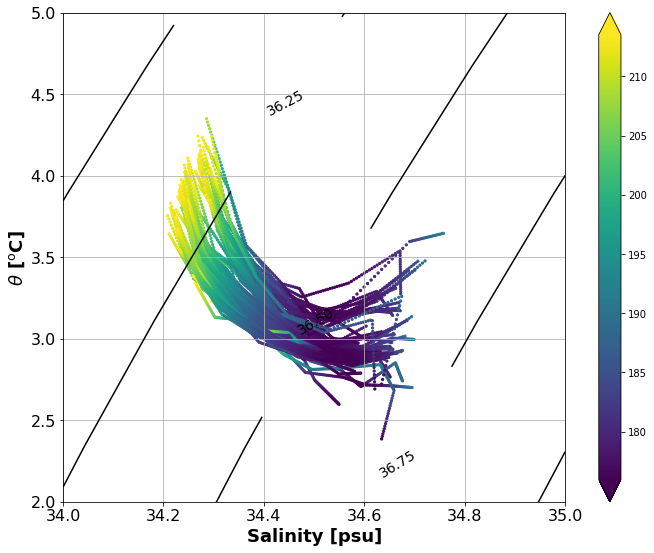

In [30]:
from matplotlib import cm
import matplotlib.pylab as pl

fig,ax=plt.subplots()
fig.set_size_inches(10,9)

for i in range(len(oxy_int0)):
    sc=ax.scatter(sal_int0[i,:],temp_int0[i,:],c=oxy_int0[i,:],s=5)
for i in range(len(oxy_int8)):
    sc=ax.scatter(sal_int8[i,:],temp_int8[i,:],c=oxy_int8[i,:],s=5)
for i in range(len(oxy_int1)):
    sc=ax.scatter(sal_int1[i,:],temp_int1[i,:],c=oxy_int1[i,:],s=5)
    
s_grid, t_grid = np.meshgrid(
    np.linspace(34,35,10),
    np.linspace(0,7,10)
)

pref = 2000
dens_grid = gsw.rho(s_grid.ravel(), t_grid.ravel(), pref).reshape(s_grid.shape)-1000

con = plt.contour(s_grid, t_grid, dens_grid, colors='k')
plt.clabel(con, fmt='%4.2f',fontsize=14)
plt.xlabel('Salinity [psu]',fontsize=18,fontweight='bold')
plt.ylabel('$\\theta$ [$^{\mathrm{o}}$C]',fontsize=18,fontweight='bold')
plt.tick_params(axis='both', labelsize=16)
plt.colorbar(sc,fraction=0.04, pad=0.06,extend='both')
plt.grid(True)
plt.xlim([34,35])
plt.ylim([2,5])

/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/soybean/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/Users/soybean/anaconda3/lib/python3.7/site-packages/ipykernel_l

[-33.659 -33.739 -34.041 -34.199 -34.486 -34.698 -34.878 -35.053 -35.303
 -35.583 -35.953 -36.422 -36.867 -37.245 -37.529 -38.21  -38.729 -39.027
 -39.544 -40.292 -40.479 -40.813 -40.82  -40.949 -41.039 -41.299 -41.55
 -41.779 -42.002 -42.589 -43.172 -43.643 -43.815 -44.072 -44.45  -44.428
 -44.845 -45.085 -45.156 -44.858 -44.59  -44.35  -44.341 -44.531 -44.447]


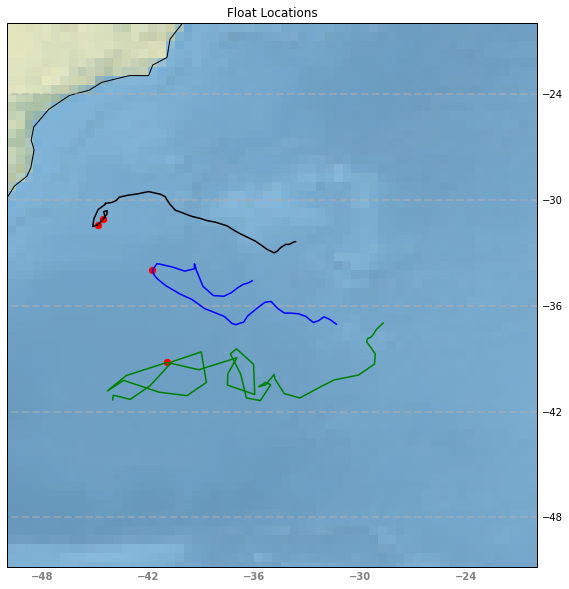

In [3]:
fd0 = xr.open_mfdataset('12700SOOCN_HRQC.nc');

fd8 = xr.open_mfdataset('12778SOOCN_HRQC.nc');

fd1 = xr.open_mfdataset('12881SOOCN_HRQC.nc');

#Lon = [fd1.Lon.values,fd8.Lon.values,fd0.Lon.values];
#Lat = [fd1.Lat.values,fd8.Lat.values,fd0.Lat.values];
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


plt.title('Float Locations')
#ax.xlabel('Longitude')
#ax.ylabel('Latitude')
ax.stock_img()
print(fd1.Lon.values-360)
   
ax.set_extent([-50, -20, 
               -50, -20])

ax.plot(fd1.Lon.values-360,fd1.Lat.values,'k-')
ax.plot(fd0.Lon.values-360,fd0.Lat.values,'b-')
ax.plot(fd8.Lon.values-360,fd8.Lat.values,'g-')

ax.scatter(fd1.Lon[39].values-360,fd1.Lat[39].values,s=40,c='r')
ax.scatter(fd1.Lon[40].values-360,fd1.Lat[40].values,s=40,c='r')
ax.scatter(fd0.Lon[17].values-360,fd0.Lat[17].values,s=40,c='r')
ax.scatter(fd8.Lon[13].values-360,fd8.Lat[13].values,s=40,c='r')

ax = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, alpha=0.5, linestyle='--')
ax.xlabels_top = False
ax.ylabels_left = False
ax.xlines = False

ax.xlabel_style = {'size': 15, 'color': 'gray'}
ax.xlabel_style = {'color': 'gray', 'weight': 'bold'}